In [5]:
import numpy as np
import random as rd
import scipy.stats as sc

l = 20
n = 100000
B = 37.5
yw = 10
xexit = 18.75 + 50

# Water level
data = np.loadtxt('Cumulative_density_function_water_level.txt', delimiter=' ', unpack=True)

def lognorm_params(mode, stddev):
    p = np.poly1d([1, -1, 0, 0, -(stddev/mode)**2])
    r = p.roots
    sol = r[(r.imag == 0) & (r.real > 0)].real
    shape = np.sqrt(np.log(sol))
    scale = mode * sol
    return shape, scale

# Start
Pf = []
for i in range(l):
    # Generate Stochastic Lognormal
    sigma, scale = lognorm_params(25, 0.5)
    D = sc.lognorm.rvs(sigma, 0, scale, size=n)
    sigma, scale = lognorm_params(4.5, 0.5)
    d = sc.lognorm.rvs(sigma, 0, scale, size=n)
    sigma, scale = lognorm_params(7.52e-4, 0.5 * 7.52e-4)
    k = sc.lognorm.rvs(sigma, 0, scale, size=n)
    sigma, scale = lognorm_params(1.00e-6, 0.5 * 1.00e-6)
    kh = sc.lognorm.rvs(sigma, 0, scale, size=n)
    sigma, scale = lognorm_params(20, 2)
    Lf = sc.lognorm.rvs(sigma, 0, scale, size=n)
    
    # Generate Stochastic Normal
    hp = sc.norm.rvs(3.50, 0.1, n)
    ysat = sc.norm.rvs(14.7222222222, 0.05 * 14.7222222222, n)
    mu = sc.norm.rvs(1.00, 0.1, n)
    
    # Generate water level
    h = []
    for q in range(n):
        w = rd.random()
        h.append(np.interp(w, data[1], data[0]))
    
    # Calc
    lambda_h = ((k * D * d) / kh) ** 0.5
    lambda_ = (lambda_h / (Lf + B + lambda_h)) * np.exp((0.5 * B - xexit) / lambda_h)
    phi_exit = hp + lambda_ * (h - hp)
    dphi = phi_exit - hp
    dphi_c = d * ((ysat - yw) / yw)
    Z = mu * dphi_c - dphi
    
    fail = 0
    for q in range(n):
        if(Z[q] < 0):
            fail += 1
    
    if(fail > 0):
        Pf.append(fail / n)
    else:
        Pf.append(0)
        
    print(i, "Pf:", Pf[i])
    
print("\nTOTAL Pf:", round(np.average(Pf), 5))
print("\nTOTAL Pf:", round(np.sum(Pf) / l, 5))

0 Pf: 0.01666
1 Pf: 0.01634
2 Pf: 0.01602
3 Pf: 0.01595
4 Pf: 0.01606
5 Pf: 0.01605
6 Pf: 0.01646
7 Pf: 0.01615
8 Pf: 0.01538
9 Pf: 0.01671
10 Pf: 0.01544
11 Pf: 0.01541
12 Pf: 0.01638
13 Pf: 0.01665
14 Pf: 0.01689
15 Pf: 0.01675
16 Pf: 0.0157
17 Pf: 0.0165
18 Pf: 0.01609
19 Pf: 0.01687

TOTAL Pf: 0.01622

TOTAL Pf: 0.01622


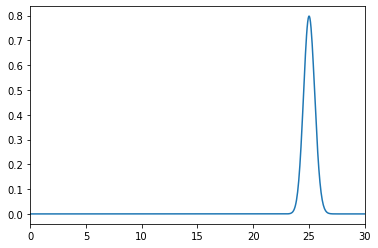

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(0, 50, 1000)
sigma, scale = lognorm_params(25, 0.5)
y = sc.lognorm.pdf(x, sigma, 0, scale)
plt.xlim(0, 30)
plt.plot(x, y)